# Table of Content

- [1.0 Preprocessing](1.0)

  - [1.1 Handling Missing values](#1.1)
  - [1.2 Handling Outlies](#1.2)
  - [1.3 Dublicated rows](#1.3)
  - [1.4 Dublicated columns](#1.4)

- [2.0 Feature selection](#2.0)

  - [2.1 Correlations](#2.1)

- [3.0 Feature constuction](#3.0)

- [4.0 Encoding](#3.0)
  - [4.1 Label encoding](#4.1)
  - [4.2 OneHotEnconding](#4.2)


In [6]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingRegressor,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

pd.options.display.max_columns = None

In [7]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/DataSets/renamed.csv"
)
heart_df = heart_df.drop(columns=["Unnamed: 0"], axis="columns")
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


# [1.0 Preprocessing](1.0)


### [1.1 Handling Missing values](#1.1)


In [8]:
null_columns = []

for col in heart_df.columns:

    if heart_df[col].isna().sum() > 0:
        null_columns.append(col)
print(len(null_columns))

0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no null columns </b><br>
    </span>    
</div>


### [1.2 Handling Outlies](#1.2)


In [9]:
def get_outliers(feature):

    Q1 = heart_df[feature].quantile(0.25)
    Q2 = heart_df[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = heart_df[
        (heart_df[feature] < lower_limit) | (heart_df[feature] > upper_limit)
    ]

    return (len(IQR_df)), lower_limit, upper_limit

In [10]:
null_columns = []

len_before = len(heart_df)

for feature in heart_df.columns:
    if heart_df[feature].dtype == "O" or heart_df[feature].dtype == "bool":
        continue
    out_liers, lower_limit, upper_limit = get_outliers(feature)
    print(out_liers)
    if out_liers > 0:
        heart_df = heart_df[
            (heart_df[feature] >= lower_limit) & (heart_df[feature] <= upper_limit)
        ]

len_after = len(heart_df)

print("len before = ", len_before)
print("len after = ", len_after)

heart_df

0
9
5
1
4
21
len before =  303
len after =  263


,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


### [1.3 Dublicated rows](#1.3)


In [11]:
dublicated = heart_df.duplicated()
heart_df[dublicated]

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no Dublicated rows</b><br>
    </span>    
</div>


### [1.4 Dublicated columns](#1.4)


In [12]:
def get_duplicate_columns(df=pd.DataFrame):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [13]:
duplicate_columns = get_duplicate_columns(
    heart_df.drop(columns=["Heart_disease"], axis=1)
)
duplicate_columns

{}

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no Dublicated columns</b><br>
    </span>    
</div>


# [2.0 Feature selection](#2.0)


### - [2.1 Correlations](#2.1)


In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

Transformed_columns = []

for feature in heart_df.columns:
    if (
        heart_df[feature].dtype == "O" or heart_df[feature].dtype == "bool"
    ) and feature != "Heart_disease":
        Transformed_columns.append(feature)

T_df = heart_df[Transformed_columns].copy()


ORE = OrdinalEncoder()
T_df = pd.DataFrame(ORE.fit_transform(T_df), columns=Transformed_columns)

for col in heart_df.columns:
    if Transformed_columns.count(col) == 0 and col != "Heart_disease":
        T_df[col] = heart_df[col].copy()
T_df

T_df

,Sex,Chest_pain,Fasting_blood_sugar,electrocardiographic,Exercise_induced_angina,Slope_of_peak_exercise,stress_test,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels
0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,63.0,145.0,233.0,150.0,2.3,0.0
1,1.0,2.0,0.0,0.0,0.0,2.0,3.0,37.0,130.0,250.0,187.0,3.5,0.0
2,0.0,1.0,0.0,2.0,0.0,0.0,3.0,41.0,130.0,204.0,172.0,1.4,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,3.0,56.0,120.0,236.0,178.0,0.8,0.0
4,0.0,3.0,0.0,0.0,1.0,0.0,3.0,57.0,120.0,354.0,163.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.0,3.0,0.0,0.0,1.0,1.0,2.0,62.0,150.0,244.0,154.0,1.4,0.0
259,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,120.0,231.0,182.0,3.8,0.0
260,1.0,3.0,1.0,0.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
261,1.0,3.0,0.0,0.0,1.0,1.0,2.0,52.0,112.0,230.0,160.0,0.0,1.0


<Axes: >

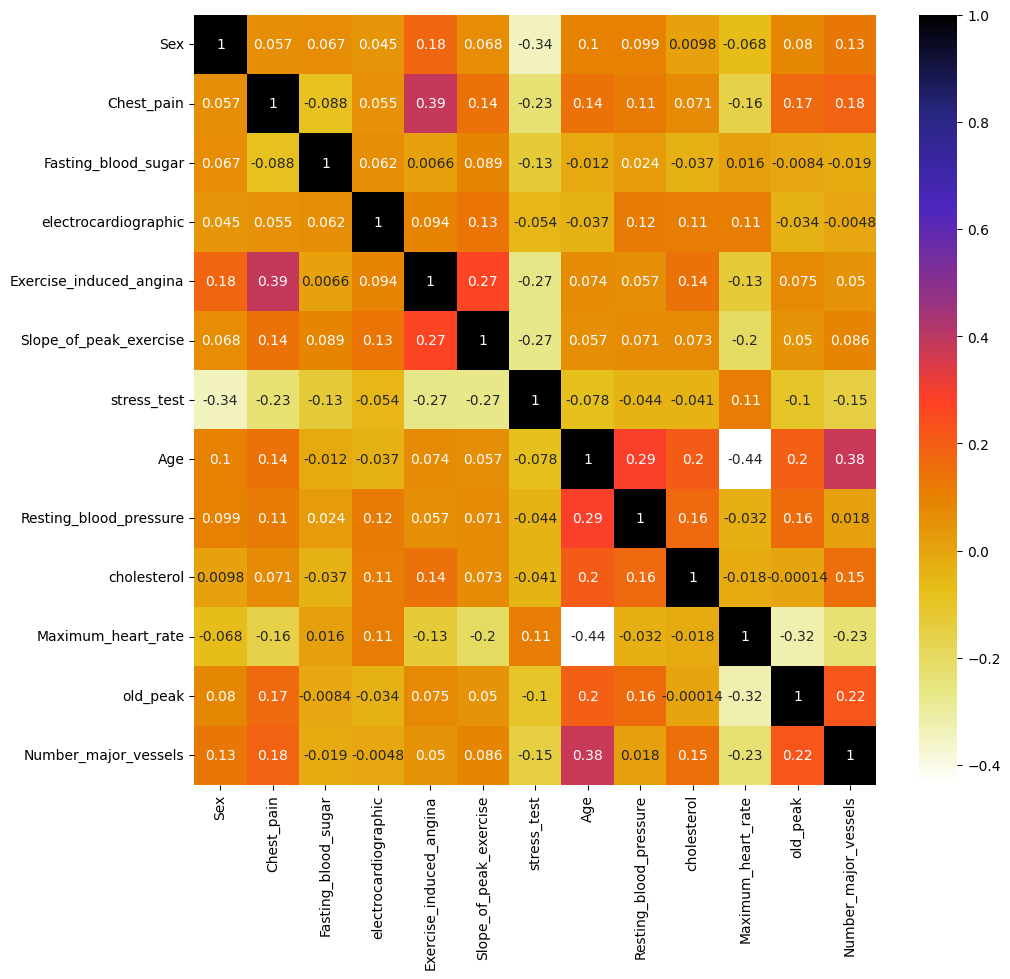

In [15]:
plt.figure(figsize=(11, 10))

correlation = T_df.corr()

sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)

In [16]:
def remove_strong_corr(data_set, corr):
    column = set()
    correlation = data_set.corr()

    for i in range(len(correlation.columns)):

        for j in range(i):
            if abs(correlation.iloc[i, j]) > corr:
                # is take the abs, because of negative correlatins, so if there is a big negative correlatins, that means that they are related
                column.add(correlation.columns[i])

    return column


correlated_columns = remove_strong_corr(T_df, corr=0.90)
len(correlated_columns)

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>There is no strong correlated columns </b><br>
    </span>    
</div>


# [3.0 Feature constuction](#3.0)


In [17]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


In [18]:
range_columns = [
    "Age",
    "Resting_blood_pressure",
    "cholesterol",
    "Fasting_blood_sugar",
    "Maximum_heart_rate",
]


for feature in range_columns:

    heart_df["range_" + feature] = heart_df["Age"].copy()

heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease,63,63,63,63,63
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease,37,37,37,37,37
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease,41,41,41,41,41
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease,56,56,56,56,56
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease,57,57,57,57,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease,57,57,57,57,57
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease,45,45,45,45,45
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease,68,68,68,68,68
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease,57,57,57,57,57


In [19]:
def age_construction(age):
    if age < 35:
        return 0
    if age < 45:
        return 1
    if age < 55:
        return 2
    if age < 65:
        return 3
    return 4


def Resting_blood_pressure_construction(Resting_blood_pressure_construction):
    if Resting_blood_pressure_construction < 115:
        return 0
    if Resting_blood_pressure_construction < 125:
        return 1
    if Resting_blood_pressure_construction < 135:
        return 2
    if Resting_blood_pressure_construction < 150:
        return 3
    return 4


def range_Fasting_blood_sugar_construction(range_Fasting_blood_sugar_construction):
    if range_Fasting_blood_sugar_construction < 40:
        return 0
    if range_Fasting_blood_sugar_construction < 50:
        return 1
    if range_Fasting_blood_sugar_construction < 60:
        return 2
    if range_Fasting_blood_sugar_construction < 70:
        return 3
    return 4


def range_cholesterol_construction(range_cholesterol):
    if range_cholesterol < 40:
        return 0
    if range_cholesterol < 50:
        return 1
    if range_cholesterol < 60:
        return 2
    if range_cholesterol < 70:
        return 3
    return 4


def range_Maximum_heart_rate_construction(range_Maximum_heart_rate):
    if range_Maximum_heart_rate < 40:
        return 0
    if range_Maximum_heart_rate < 50:
        return 1
    if range_Maximum_heart_rate < 60:
        return 2
    if range_Maximum_heart_rate < 70:
        return 3
    return 4


heart_df["range_Age"] = heart_df["range_Age"].apply(age_construction)
heart_df["range_Resting_blood_pressure"] = heart_df[
    "range_Resting_blood_pressure"
].apply(Resting_blood_pressure_construction)
heart_df["range_Fasting_blood_sugar"] = heart_df["range_Fasting_blood_sugar"].apply(
    range_Fasting_blood_sugar_construction
)
heart_df["range_Maximum_heart_rate"] = heart_df["range_Maximum_heart_rate"].apply(
    range_Maximum_heart_rate_construction
)

heart_df["range_cholesterol"] = heart_df["range_cholesterol"].apply(
    range_cholesterol_construction
)

In [20]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease,3,0,3,3,3
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease,1,0,0,0,0
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease,1,0,1,1,1
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease,3,0,2,2,2
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease,3,0,2,2,2
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease,2,0,1,1,1
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease,4,0,3,3,3
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease,3,0,2,2,2


# [4.0 Encoding](#3.0)


### [4.1 Label encoding](#4.1)


In [21]:
mapper = {"Heart Disease": 1, "No Disease": 0}

heart_df["Heart_disease"] = heart_df["Heart_disease"].map(mapper)

### [4.2 OneHotEnconding](#4.2)


In [22]:
cat_columns = []

for i in heart_df.columns:
    if heart_df[i].dtype == "O" or heart_df[i].dtype == "bool":
        cat_columns.append(i)


final_heart_df = pd.get_dummies(heart_df, drop_first=True, columns=cat_columns)


for i in final_heart_df.columns:
    if final_heart_df[i].dtype == "bool":
        final_heart_df[i] = final_heart_df[i].astype("int32")

final_heart_df

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,63,145,233,150,2.3,0,1,3,0,3,3,3,1,0,0,0,1,0,1,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,3,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,3,0,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,3,0,2,2,2,0,0,0,1,0,0,0,1,1,0,0,1,0
299,45,110,264,132,1.2,0,0,2,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,0,4,0,3,3,3,1,0,0,1,1,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,0,3,0,2,2,2,1,0,0,1,0,0,0,1,1,0,0,1,0


In [23]:
final_heart_df.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/Prepered data sets/final_dataset.csv"
)